[*********************100%***********************]  1 of 1 completed

Mean Squared Error (MSE): 182.05


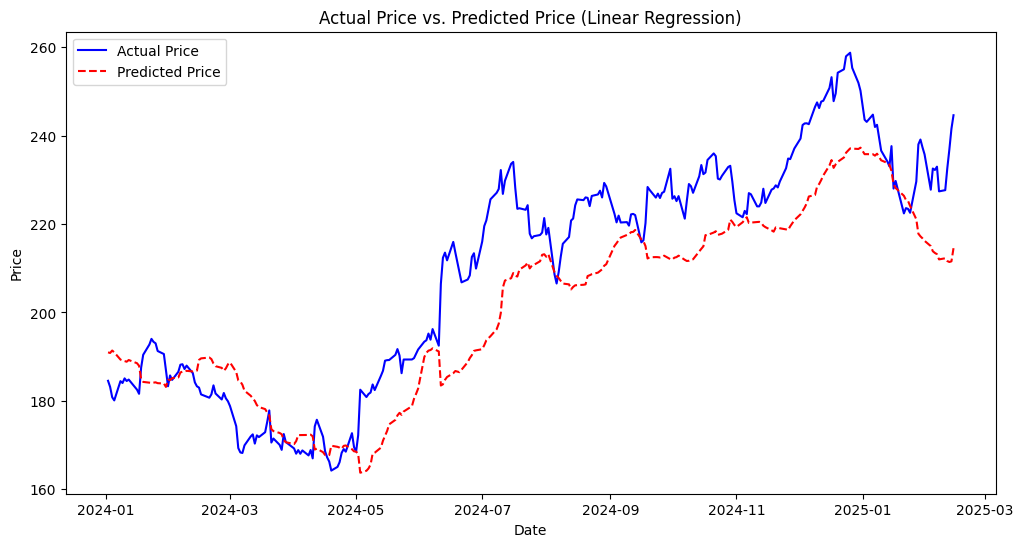

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Get data
data = yf.download('AAPL', start='2023-01-01', end='2025-02-18', auto_adjust=False)

# Feature engineering
data['Returns'] = data['Adj Close'].pct_change()
data['SMA'] = data['Adj Close'].rolling(window=20).mean()
data['Volatility'] = data['Returns'].rolling(window=20).std()
data.dropna(inplace=True)

# Construct features and labels
X = data[['SMA', 'Volatility']]
y = data['Adj Close']

# Split training and testing sets
X_train = X[X.index < '2024-01-01']
X_test = X[X.index >= '2024-01-01']
y_train = y[y.index < '2024-01-01']
y_test = y[y.index >= '2024-01-01']

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Actual Price vs. Predicted Price (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig("regression_predict.png")


In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'決定係數（R^2）：{r2:.2f}')

決定係數（R^2）：0.73


# Classification

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 構建標籤
data['Target'] = np.where(data['Returns'] > 0, 1, 0)

# 更新特徵和標籤
y = data['Target']
X_train = X_train_scaled
X_test = X_test_scaled
y_train = y[y.index < '2024-01-01']
y_test = y[y.index >= '2024-01-01']

# 建立模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'準確率：{accuracy:.2%}')

# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)
print('混淆矩陣：\n', cm)

# 分類報告
report = classification_report(y_test, y_pred)
print('分類報告：\n', report)

準確率：54.96%
混淆矩陣：
 [[  3 122]
 [  5 152]]
分類報告：
               precision    recall  f1-score   support

           0       0.38      0.02      0.05       125
           1       0.55      0.97      0.71       157

    accuracy                           0.55       282
   macro avg       0.46      0.50      0.38       282
weighted avg       0.48      0.55      0.41       282



# SVM

In [10]:
from sklearn.svm import SVC

# 建立模型
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'準確率：{accuracy:.2%}')

準確率：56.38%


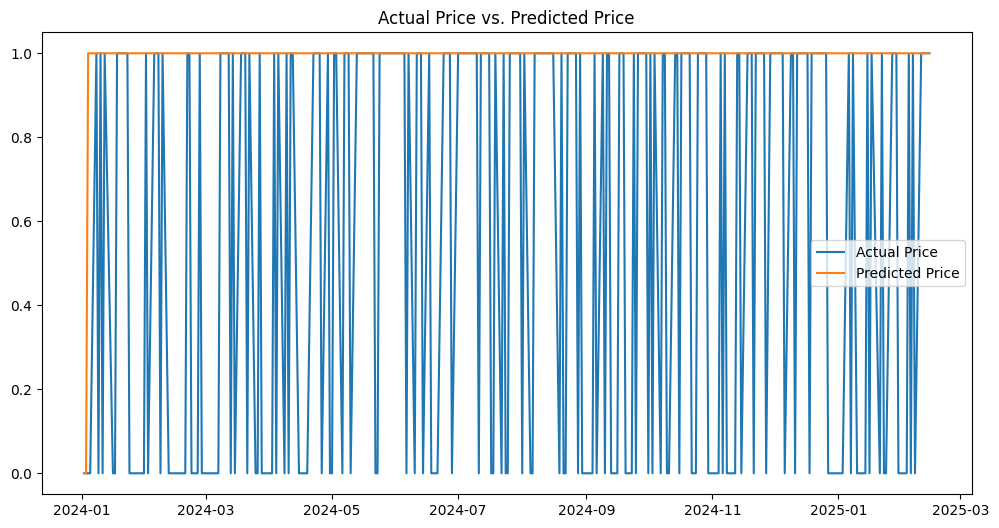

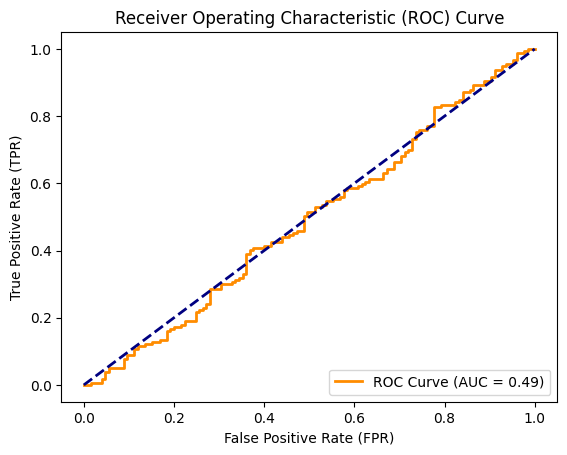

In [12]:
import matplotlib.pyplot as plt

# Regression results visualization
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.show()

# Classification results visualization
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
y_score = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()